In [2]:
#Name: Akshit Arora
#email: akshitarora911@gmail.com
#phno: 9034300993
#Stage 1:
#1) Calculate % growth of funding between year 2008 & 2009.
#2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.
# 



#stage 1
import numpy as np
import pandas as pd
df = pd.read_excel('https://query.data.world/s/q7ulyolupbknnnjwoi3mhthj6cnu65',header=1)
f08 = np.array(df['C1) Funding FY2008'])
f09 = np.array(df['C2) Funding FY2009'])
#

def gr_per_cal(up,lw):
    gr_per =(up-lw)/lw*100
    gr_per = np.around(gr_per,decimals=0)
    return gr_per

growth_per = gr_per_cal(f09,f08)
def pos_neg_tag (growth_per):
    a= []
    for element in growth_per:
        if element>=0:
            a.append(1)
        else:
            a.append(0)
    return a

target = pos_neg_tag(growth_per)
#stage 1 Complete


Index(['Index Number', 'Investment Name', 'Agency', 'Subagency',
       'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       ...
       'Unnamed: 246', 'Unnamed: 247',
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 249',
       'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type', 'Unnamed: 252',
       'Unnamed: 253', 'Y5) Expert Review Type', 'Unnamed: 255'],
      dtype='object', length=256)


C:\Users\Phoenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Phoenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


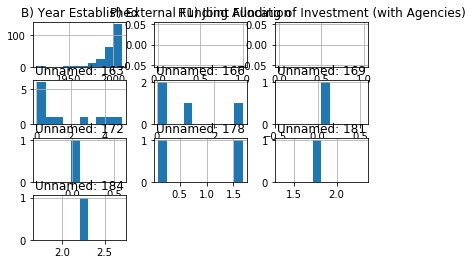

C:\Users\Phoenix\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


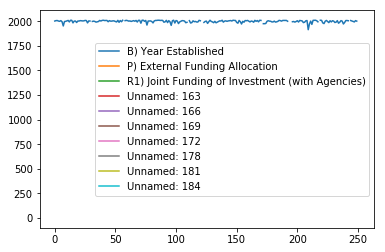

In [5]:
#stage 2
import matplotlib.pyplot as plt
dfcopy = df.copy()
dfcopy.drop(['C1) Funding FY2008','C2) Funding FY2009', 'C3) Funding FY2010'], axis=1, inplace=True)
dfcopy.hist()
plt.show()
dfcopy.plot(x=dfcopy.index, y=dfcopy.columns)
    
from sklearn.metrics import mutual_info_score
a =[]
#for b in df.columns:
#    a.append(mutual_info_score(target,df['b']))  
#stage 2 complete


In [6]:
#Stage 3:
#1) Divide data into train & test samples. (70-30 split)
#2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.
#3) Write testcases on all user defined functions using pytest framework. This is one of the most important steps of this interview.

#stage 3
X= df.iloc[:,5:9].values

y = target
#checking the number of null values
df.isnull().sum()

#featurescaling
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#X = labelencoder_X.fit_transform(X)
##taking care of missing values
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='nan', strategy='mean',axis=0)
#imputer=imputer.fit(X)
#X = imputer.transform[X]
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=42)

from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)
predictions = my_model.predict(X_test)

from sklearn.metrics import roc_auc_score
print("Receiver Operating Characteristic Curve (ROC AUC) from prediction scores: " + str(roc_auc_score( y_test, predictions)))

#stage 3 complete   

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Receiver Operating Characteristic Curve (ROC AUC) from prediction scores: 0.8658823529411764
